In [1]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt

## 1. Load Dataset

In [2]:
# Loading data
file_path = Path("crypto_data.csv")
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
df.IsTrading.unique()

array([ True, False])

## 2. Data Preparation 

In [4]:
## filter entries with isTrading =True
df_red=df[df['IsTrading']==True].copy()

In [5]:
## Drop IsTrading Column
df_red.drop('IsTrading',axis=1,inplace=True)

In [6]:
df_red.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [7]:
df_red.shape

(1144, 6)

In [8]:
## Remove all rows that have at least one null value.
df_red.dropna(inplace=True)

In [9]:
df_red.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [10]:
df_red.shape

(685, 6)

In [11]:
df_red.TotalCoinsMined.value_counts()

0.000000e+00    152
1.000000e+09      7
1.000000e+08      7
2.000000e+07      2
2.500000e+07      2
               ... 
8.345040e+07      1
1.666282e+07      1
1.195525e+06      1
1.345549e+08      1
1.283270e+05      1
Name: TotalCoinsMined, Length: 520, dtype: int64

In [12]:
## Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
df_red.query('TotalCoinsMined>0',inplace=True)

In [13]:
df_red.TotalCoinsMined.value_counts()

1.000000e+08    7
1.000000e+09    7
2.000000e+07    2
2.500000e+07    2
4.199995e+01    1
               ..
8.345040e+07    1
1.666282e+07    1
1.195525e+06    1
1.345549e+08    1
1.283270e+05    1
Name: TotalCoinsMined, Length: 518, dtype: int64

In [14]:
df_red.shape

(532, 6)

In [15]:
# delete the `CoinName` from the original dataframe.
df_red.drop('CoinName',axis=1,inplace=True)

In [16]:
df_red.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [17]:
## Remove Unnamed: 0 column
df_red.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
## Convert `Algorithm` and `ProofType`, into numerical data. 

In [19]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [20]:
## Transform TotalCoinSupply to float type
df_red['TotalCoinSupply']=df_red['TotalCoinSupply'].astype('float')

In [21]:
df_red.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
8,Ethash,PoW,1.076842e+08,0.000000e+00


In [22]:
## Transform categorical columns to numerical

In [23]:
df_red.shape

(532, 4)

In [24]:
df_red_dummies=pd.get_dummies(df_red,drop_first=True)

In [25]:
df_red_dummies.shape

(532, 96)

Applying the one hot encoding with get_dummies, we went from 4 columns to 96 columns. We had two categorical columns: Algorithm and ProofType

In [26]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df_red_dummies),columns=df_red_dummies.columns)

In [28]:
df_scaled.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
1,-0.093970,-0.145009,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
2,0.524946,4.489424,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
3,-0.116715,-0.152560,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
4,-0.114747,-0.152870,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396


## 3. Dimensionality Reduction

#### PCA

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca=PCA(n_components=0.9)
df_pca=pca.fit_transform(df_scaled)

In [31]:
pca.explained_variance_ratio_.sum()

0.9094171399107913

In [32]:
df_scaled.shape,df_pca.shape

((532, 96), (532, 74))

#### TSNE

In [33]:
from sklearn.manifold import TSNE

In [34]:
# transform data that is in 74 dimmensions (columns) to  2 dimmensions so we can visualize the dataset

In [35]:
tsne=TSNE(2)
df_tsne=tsne.fit_transform(df_pca)

In [36]:
df_pca.shape,df_tsne.shape

((532, 74), (532, 2))

In [37]:
df_tsne

array([[ 11.3374   , -12.372788 ],
       [ 13.761249 ,  -7.012221 ],
       [ 21.288221 , -20.015114 ],
       ...,
       [-20.598436 ,  -4.8614416],
       [-20.09276  ,   6.0362115],
       [  0.3838461,  15.162601 ]], dtype=float32)

In [38]:
import matplotlib.pyplot as plt

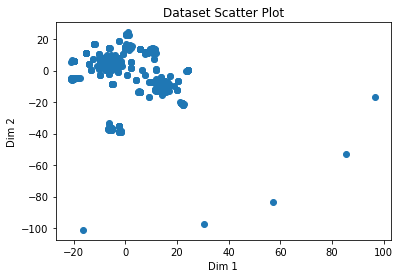

In [39]:
plt.title('Dataset Scatter Plot')
plt.scatter(df_tsne[:,0],df_tsne[:,1])
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

After applying TSNE to the dataset, we can clearly see at least 5 cluster that were formed by the dataset in the two dimmensional space

## 4. Cluster Analysis with K-Means

In [42]:
from sklearn.cluster import KMeans
inertias=[]
for k_clusters in range(2,11):
    kmeans=KMeans(k_clusters,random_state=0) ## random_state is used to make results reproducible
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

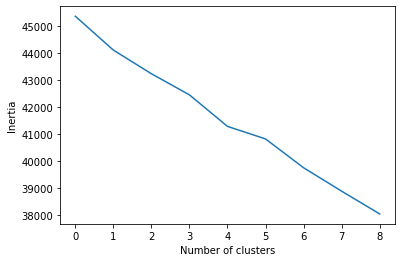

In [43]:
plt.plot(inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

## 5. Recommendation

- Based on the elbow method, we can cluster together the different cryptocurrencies 
- The optimum number of clusters would be 4 or 5.
